# Código para implementar um pacote de onda para partícula livre

In [5]:
from collections import Counter
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
from ipywidgets import interact
import ipywidgets as wg


## Reproducao de PSI^2 segundo Sakurai - apêndice B1

Energia (eV): 3.5 >> Lambda: 354.22857142857146 nm
Energia (J): 5.6e-19
Energia: 3.5eV, t=0.us, Largura: 2.7281668601810444e-21
Energia: 3.5eV, t=0.172us, Largura: 0.03637110867178924
Energia: 3.5eV, t=1.700us, Largura: 0.6024149286498353
Energia: 3.5eV, t=1.000us, Largura: 1.2294182217343577
Energia: 3.5eV, t=1.720us, Largura: 3.637110867178924


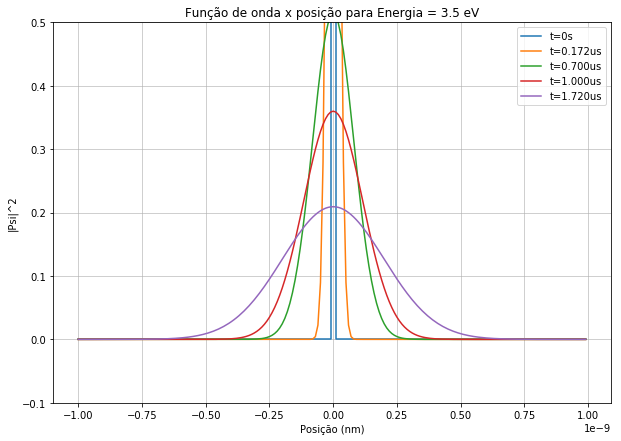

In [3]:

pi = math.pi

c = 3e+8      #constante da velocidade da luz
m = 9.11e-31  #massa do eletron em kg
h = 6.63e-34  #constante Planck em J.s
_h_ = h / (2*pi)  #constante Planck normalizada
hc_eV = 1.2398
a = 1         #parametro livre a

def exp(w):
    return(math.e**w)

def wavewidth(E, t):
    value = (_h_**2 / (8*E*m)) + (2*E*t**2/m)
    return(value)

def wavepacket_free(E, x, t):
    #Atencao: com energia E obtenho k
    k = ((E * 2*m)**0.5) / _h_
    base = wavewidth(E, t)
    normal = (1 / (2*pi*base)) ** 0.5
    #normal = (base / 2*pi**3) ** 0.25
    integrando = ( -((k*x)**2  / (2*base)) ) 
    value = normal  * (exp(integrando)) #/ base
    return(value)
    
def array_wavepacket(energy):
    xvet = []
    evet_t0 = []
    evet_t1 = []
    evet_t2 = []
    evet_t3 = []
    evet_t4 = []
    x = -1
    x_end = 1  #percorrendo de 0 a 10 micrometros
    energy_J = energy * 1.6e-19  #convertendo energia de eV para Joule
    print('Energia: '+str(energy)+'eV, t=0.us, Largura: '+str(wavewidth(energy_J, 0)))     #t = 0
    print('Energia: '+str(energy)+'eV, t=0.172us, Largura: '+str(wavewidth(energy_J, 0.172e-6)))     #tempo em 1 microsegundo
    print('Energia: '+str(energy)+'eV, t=1.700us, Largura: '+str(wavewidth(energy_J, 0.700e-6)))     #tempo em 2 microsegundos
    print('Energia: '+str(energy)+'eV, t=1.000us, Largura: '+str(wavewidth(energy_J, 1.000e-6)))     #tempo em 3 microsegundos
    print('Energia: '+str(energy)+'eV, t=1.720us, Largura: '+str(wavewidth(energy_J, 1.720e-6)))   #tempo em 10 microsegundos
    while x < x_end:
        dist = x * 1e-9
        xvet.append(dist)
        evet_t0.append(wavepacket_free(energy_J, dist, 0))     #t = 0
        evet_t1.append(wavepacket_free(energy_J, dist, 0.172e-6))     #tempo em 1 microsegundo
        evet_t2.append(wavepacket_free(energy_J, dist, 0.700e-6))     #tempo em 2 microsegundos
        evet_t3.append(wavepacket_free(energy_J, dist, 1.000e-6))     #tempo em 3 microsegundos
        evet_t4.append(wavepacket_free(energy_J, dist, 1.720e-6))   #tempo em 10 microsegundos
        x += 0.01
        
    return([xvet, evet_t0, evet_t1, evet_t2, evet_t3, evet_t4])

fig=plt.figure(figsize=(10,7))

Energia = 3.5 #Energia em eV
wavelen = ((hc_eV) / Energia) * 1000

print('Energia (eV): '+str(Energia)+' >> Lambda: '+str(wavelen)+' nm')
print('Energia (J): '+str(Energia*1.6e-19))
#print('tau (s): '+str(2*m*a/_h_))

e1vet = array_wavepacket(Energia)  
plt.plot(e1vet[0],e1vet[1])
plt.plot(e1vet[0],e1vet[2])
plt.plot(e1vet[0],e1vet[3])
plt.plot(e1vet[0],e1vet[4])
plt.plot(e1vet[0],e1vet[5])

plt.legend(labels=['t=0s','t=0.172us','t=0.700us','t=1.000us','t=1.720us'],loc='upper right')

plt.ylim(-0.1, 0.5)
#plt.xlim(-1, 1)
#plt.ylim(-0., 1.)
plt.grid(alpha=0.75)

plt.xlabel('Posição')
plt.ylabel('|Psi|^2')
plt.title('Função de onda x posição para Energia = 3.5 eV')
plt.savefig('Plot_E1.jpg')


plt.show()

#interact (wavepacket,t=(0.0,5.0,0.2),m=(0,10),a=(0,1,0.25),l=(0,3),h=(0,10));

Energia (eV): 100.0 >> Lambda: 12.398 nm
Energia (J): 1.5999999999999998e-17
Energia: 1.5999999999999998e-17, t=0.us, Largura: 9.548584010633656e-23
Energia: 1.5999999999999998e-17, t=0.172us, Largura: 1.0391745334796927
Energia: 1.5999999999999998e-17, t=1.700us, Largura: 17.211855104281003
Energia: 1.5999999999999998e-17, t=1.000us, Largura: 35.126234906695935
Energia: 1.5999999999999998e-17, t=1.720us, Largura: 103.91745334796924


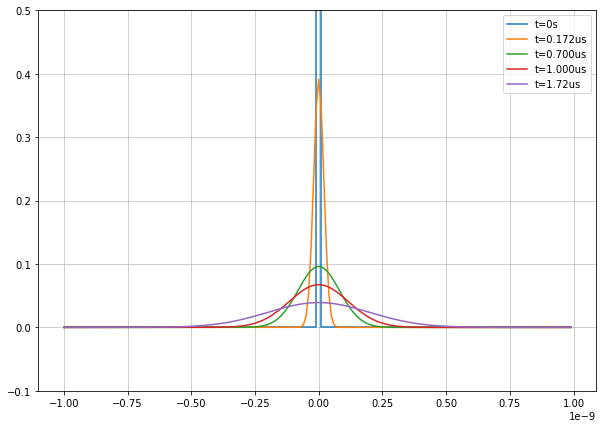

In [200]:
fig=plt.figure(figsize=(10,7))

Energia = 0.1e+3 #Energia em eV
wavelen = ((hc_eV) / Energia) * 1000
print('Energia (eV): '+str(Energia)+' >> Lambda: '+str(wavelen)+' nm')
print('Energia (J): '+str(Energia*1.6e-19))
#print('tau (s): '+str(2*m*a/_h_))

e2vet = array_wavepacket(Energia)  
plt.plot(e2vet[0],e2vet[1])
plt.plot(e2vet[0],e2vet[2])
plt.plot(e2vet[0],e2vet[3])
plt.plot(e2vet[0],e2vet[4])
plt.plot(e2vet[0],e2vet[5])

plt.legend(labels=['t=0s','t=0.172us','t=0.700us','t=1.000us','t=1.72us'],loc='upper right')


#plt.xlim(-0.5, 0.5)
plt.ylim(-0.1, 0.5)
#plt.ylim(-0., 1.)
plt.grid(alpha=0.75)

plt.xlabel('Posição')
plt.ylabel('|Psi|^2')
plt.title('Função de onda x posição para Energia = 100 eV')
plt.savefig('Plot_E2.jpg')



plt.show()


Energia (eV): 50 >> Lambda: 24.796 nm
Energia (J): 7.999999999999999e-18
Energia: 7.999999999999999e-18, t=0.us, Largura: 1.9097168021267313e-22
Energia: 7.999999999999999e-18, t=0.172us, Largura: 0.5195872667398463
Energia: 7.999999999999999e-18, t=1.700us, Largura: 8.605927552140502
Energia: 7.999999999999999e-18, t=1.000us, Largura: 17.563117453347967
Energia: 7.999999999999999e-18, t=1.720us, Largura: 51.95872667398462


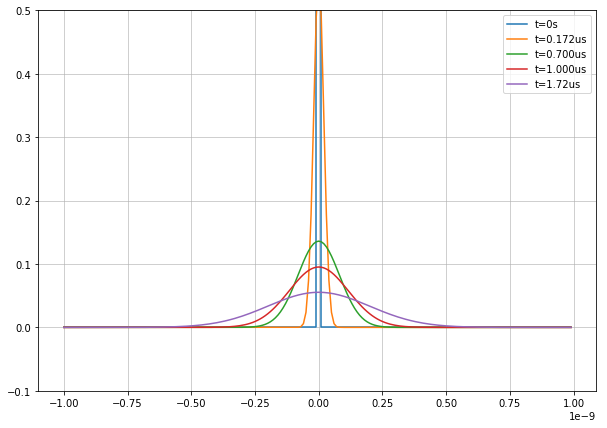

In [201]:
fig=plt.figure(figsize=(10,7))

Energia = 50 #Energia em 1eV 
wavelen = ((hc_eV) / Energia) * 1000
print('Energia (eV): '+str(Energia)+' >> Lambda: '+str(wavelen)+' nm')
print('Energia (J): '+str(Energia*1.6e-19))
#print('tau (s): '+str(2*m*a/_h_))

e2vet = array_wavepacket(Energia)  
plt.plot(e2vet[0],e2vet[1])
plt.plot(e2vet[0],e2vet[2])
plt.plot(e2vet[0],e2vet[3])
plt.plot(e2vet[0],e2vet[4])
plt.plot(e2vet[0],e2vet[5])

plt.legend(labels=['t=0s','t=0.172us','t=0.700us','t=1.000us','t=1.72us'],loc='upper right')


#plt.xlim(-0.5, 0.5)
plt.ylim(-0.1, 0.5)
#plt.ylim(-0., 1.)
plt.grid(alpha=0.75)

plt.xlabel('Posição')
plt.ylabel('|Psi|^2')
plt.title('Função de onda x posição para Energia = 50 eV')
plt.savefig('Plot_E3.jpg')



plt.show()


In [11]:

pi = math.pi

c = 3e+8      #constante da velocidade da luz
m = 9.11e-31  #massa do eletron em kg
h = 6.63e-34  #constante Planck em J.s
_h_ = h / (2*pi)  #constante Planck normalizada
hc_eV = 1.2398
a = 1         #parametro livre a

def exp(w):
    return(math.e**w)

def wavewidth(E, t):
    value = (_h_**2 / (8*E*m)) + (2*E*t**2/m)
    return(value)

def wavepacket_free(E, x, t):
    #Atencao: com energia E obtenho k
    k = ((E * 2*m)**0.5) / _h_
    base = wavewidth(E, t)
    normal = (1 / (2*pi*base)) ** 0.5
    #normal = (base / 2*pi**3) ** 0.25
    integrando = ( -((k*x)**2  / (2*base)) ) 
    value = normal  * (exp(integrando)) #/ base
    return(value)
    
def array_wavepacket(energy):
    xvet = []
    evet_t0 = []
    evet_t1 = []
    evet_t2 = []
    evet_t3 = []
    evet_t4 = []
    x = -1
    x_end = 1  #percorrendo de 0 a 10 micrometros
    energy_J = energy * 1.6e-19  #convertendo energia de eV para Joule
    print('Energia: '+str(energy)+'eV, t=0.us, Largura: '+str(wavewidth(energy_J, 0)))     #t = 0
    print('Energia: '+str(energy)+'eV, t=0.172us, Largura: '+str(wavewidth(energy_J, 0.172e-6)))     #tempo em 1 microsegundo
    print('Energia: '+str(energy)+'eV, t=1.700us, Largura: '+str(wavewidth(energy_J, 0.700e-6)))     #tempo em 2 microsegundos
    print('Energia: '+str(energy)+'eV, t=1.000us, Largura: '+str(wavewidth(energy_J, 1.000e-6)))     #tempo em 3 microsegundos
    print('Energia: '+str(energy)+'eV, t=1.720us, Largura: '+str(wavewidth(energy_J, 1.720e-6)))   #tempo em 10 microsegundos
    while x < x_end:
        dist = x * 1e-9
        xvet.append(dist)
        evet_t0.append(wavepacket_free(energy_J, dist, 0))     #t = 0
        evet_t1.append(wavepacket_free(energy_J, dist, 0.172e-6))     #tempo em 1 microsegundo
        evet_t2.append(wavepacket_free(energy_J, dist, 0.700e-6))     #tempo em 2 microsegundos
        evet_t3.append(wavepacket_free(energy_J, dist, 1.000e-6))     #tempo em 3 microsegundos
        evet_t4.append(wavepacket_free(energy_J, dist, 1.720e-6))   #tempo em 10 microsegundos
        x += 0.01
        
    return([xvet, evet_t0, evet_t1, evet_t2, evet_t3, evet_t4])

def plotwavepacket(Energia):
    fig=plt.figure(figsize=(10,7))

    #Energia = 3.5 #Energia em eV
    wavelen = ((hc_eV) / Energia) * 1000

    print('Energia (eV): '+str(Energia)+' >> Lambda: '+str(wavelen)+' nm')
    print('Energia (J): '+str(Energia*1.6e-19))
    #print('tau (s): '+str(2*m*a/_h_))

    e1vet = array_wavepacket(Energia)  
    plt.plot(e1vet[0],e1vet[1])
    plt.plot(e1vet[0],e1vet[2])
    plt.plot(e1vet[0],e1vet[3])
    plt.plot(e1vet[0],e1vet[4])
    plt.plot(e1vet[0],e1vet[5])

    plt.legend(labels=['t=0s','t=0.172us','t=0.700us','t=1.000us','t=1.720us'],loc='upper right')

    plt.ylim(-0.1, 0.5)
    #plt.xlim(-1, 1)
    #plt.ylim(-0., 1.)
    plt.grid(alpha=0.75)

    plt.xlabel('Posição')
    plt.ylabel('|Psi|^2')
    plt.title('Função de onda x posição para Energia = '+str(Energia)+' eV')
    #plt.savefig('Plot_Ex.jpg')


    plt.show()

    
interact (plotwavepacket,Energia=(1, 1000, 5));



interactive(children=(IntSlider(value=496, description='Energia', max=1000, min=1, step=5), Output()), _dom_classes=('widget-interact',))